In [1]:
# import data 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
# Basic informations

print(train.shape)
print(train.info())
train.head()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

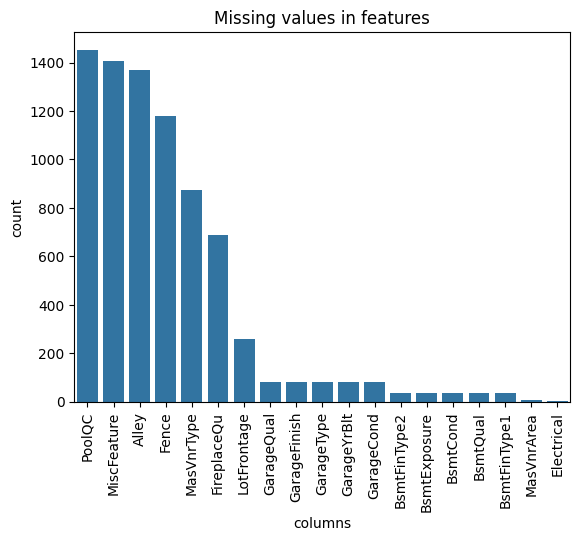

In [3]:
# Visualize missing values
missing = train.isna().sum().sort_values(ascending=False)
missing = missing[missing>0]

data = pd.DataFrame({
    'columns':missing.index,
    'count':missing.values
})
sns.barplot(data=data, x="columns", y="count")
plt.xticks(rotation=90)
plt.title("Missing values in features");

In [4]:
# Handle missing values

from sklearn.impute import SimpleImputer

# Drop feature with too many missing value
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], inplace=True)

numerical_features = train.select_dtypes(include=['int64','float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

# impute reamining 
numerical_imputer = SimpleImputer(strategy='median') # median because outliers doesnt' affect it much
categorical_imputer = SimpleImputer(strategy='most_frequent') 

train[numerical_features] = numerical_imputer.fit_transform(train[numerical_features])
train[categorical_features] = categorical_imputer.fit_transform(train[categorical_features])

missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
print(missing) # if printed empty then no null values

Series([], dtype: int64)


Skewness: 1.8828757597682129


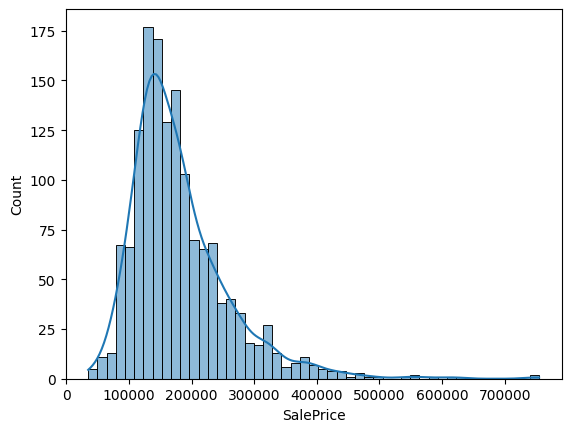

In [5]:
#  Target variable analysis

sns.histplot(train['SalePrice'],kde=True)
print(f"Skewness: {train['SalePrice'].skew()}")

Skewness: 0.12134661989685333


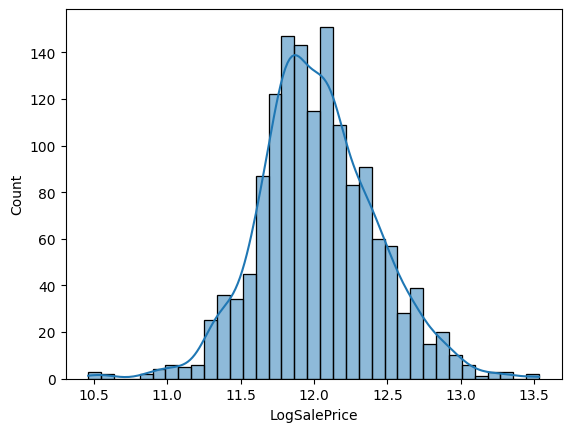

In [6]:
#  Target variable is right skewed. So normalizing it:
import numpy as np
train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True)
print(f"Skewness: {train['LogSalePrice'].skew()}")

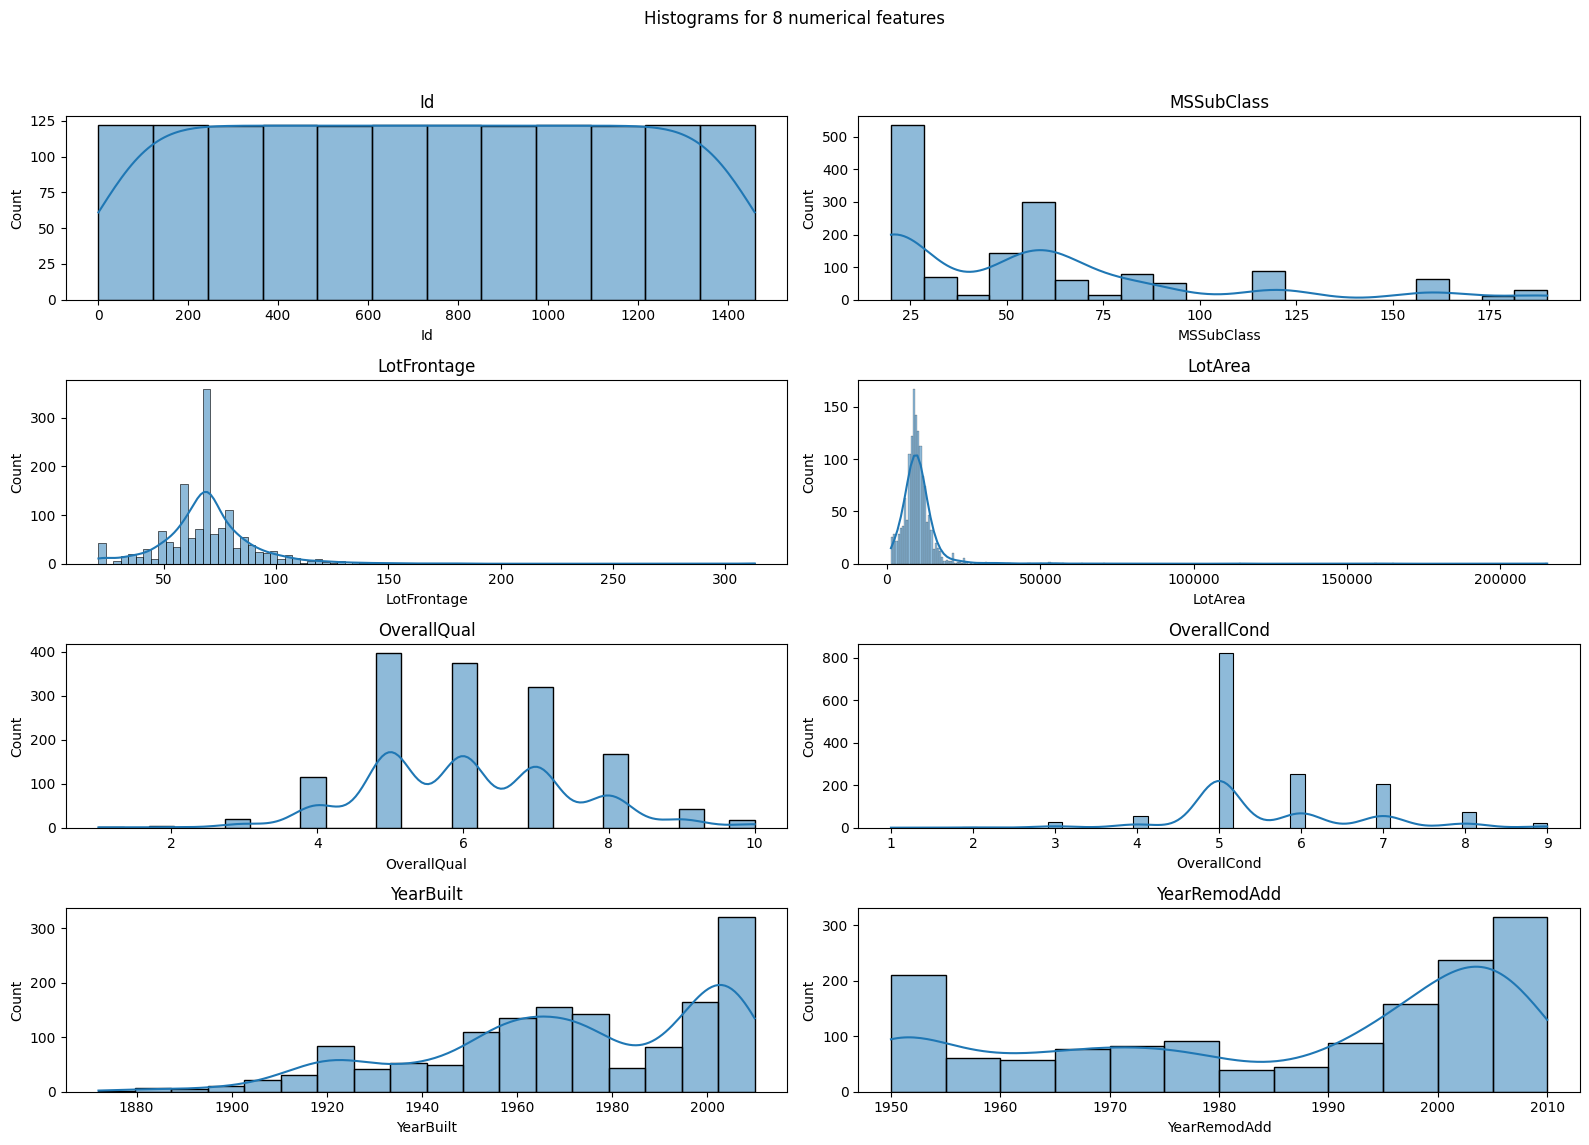

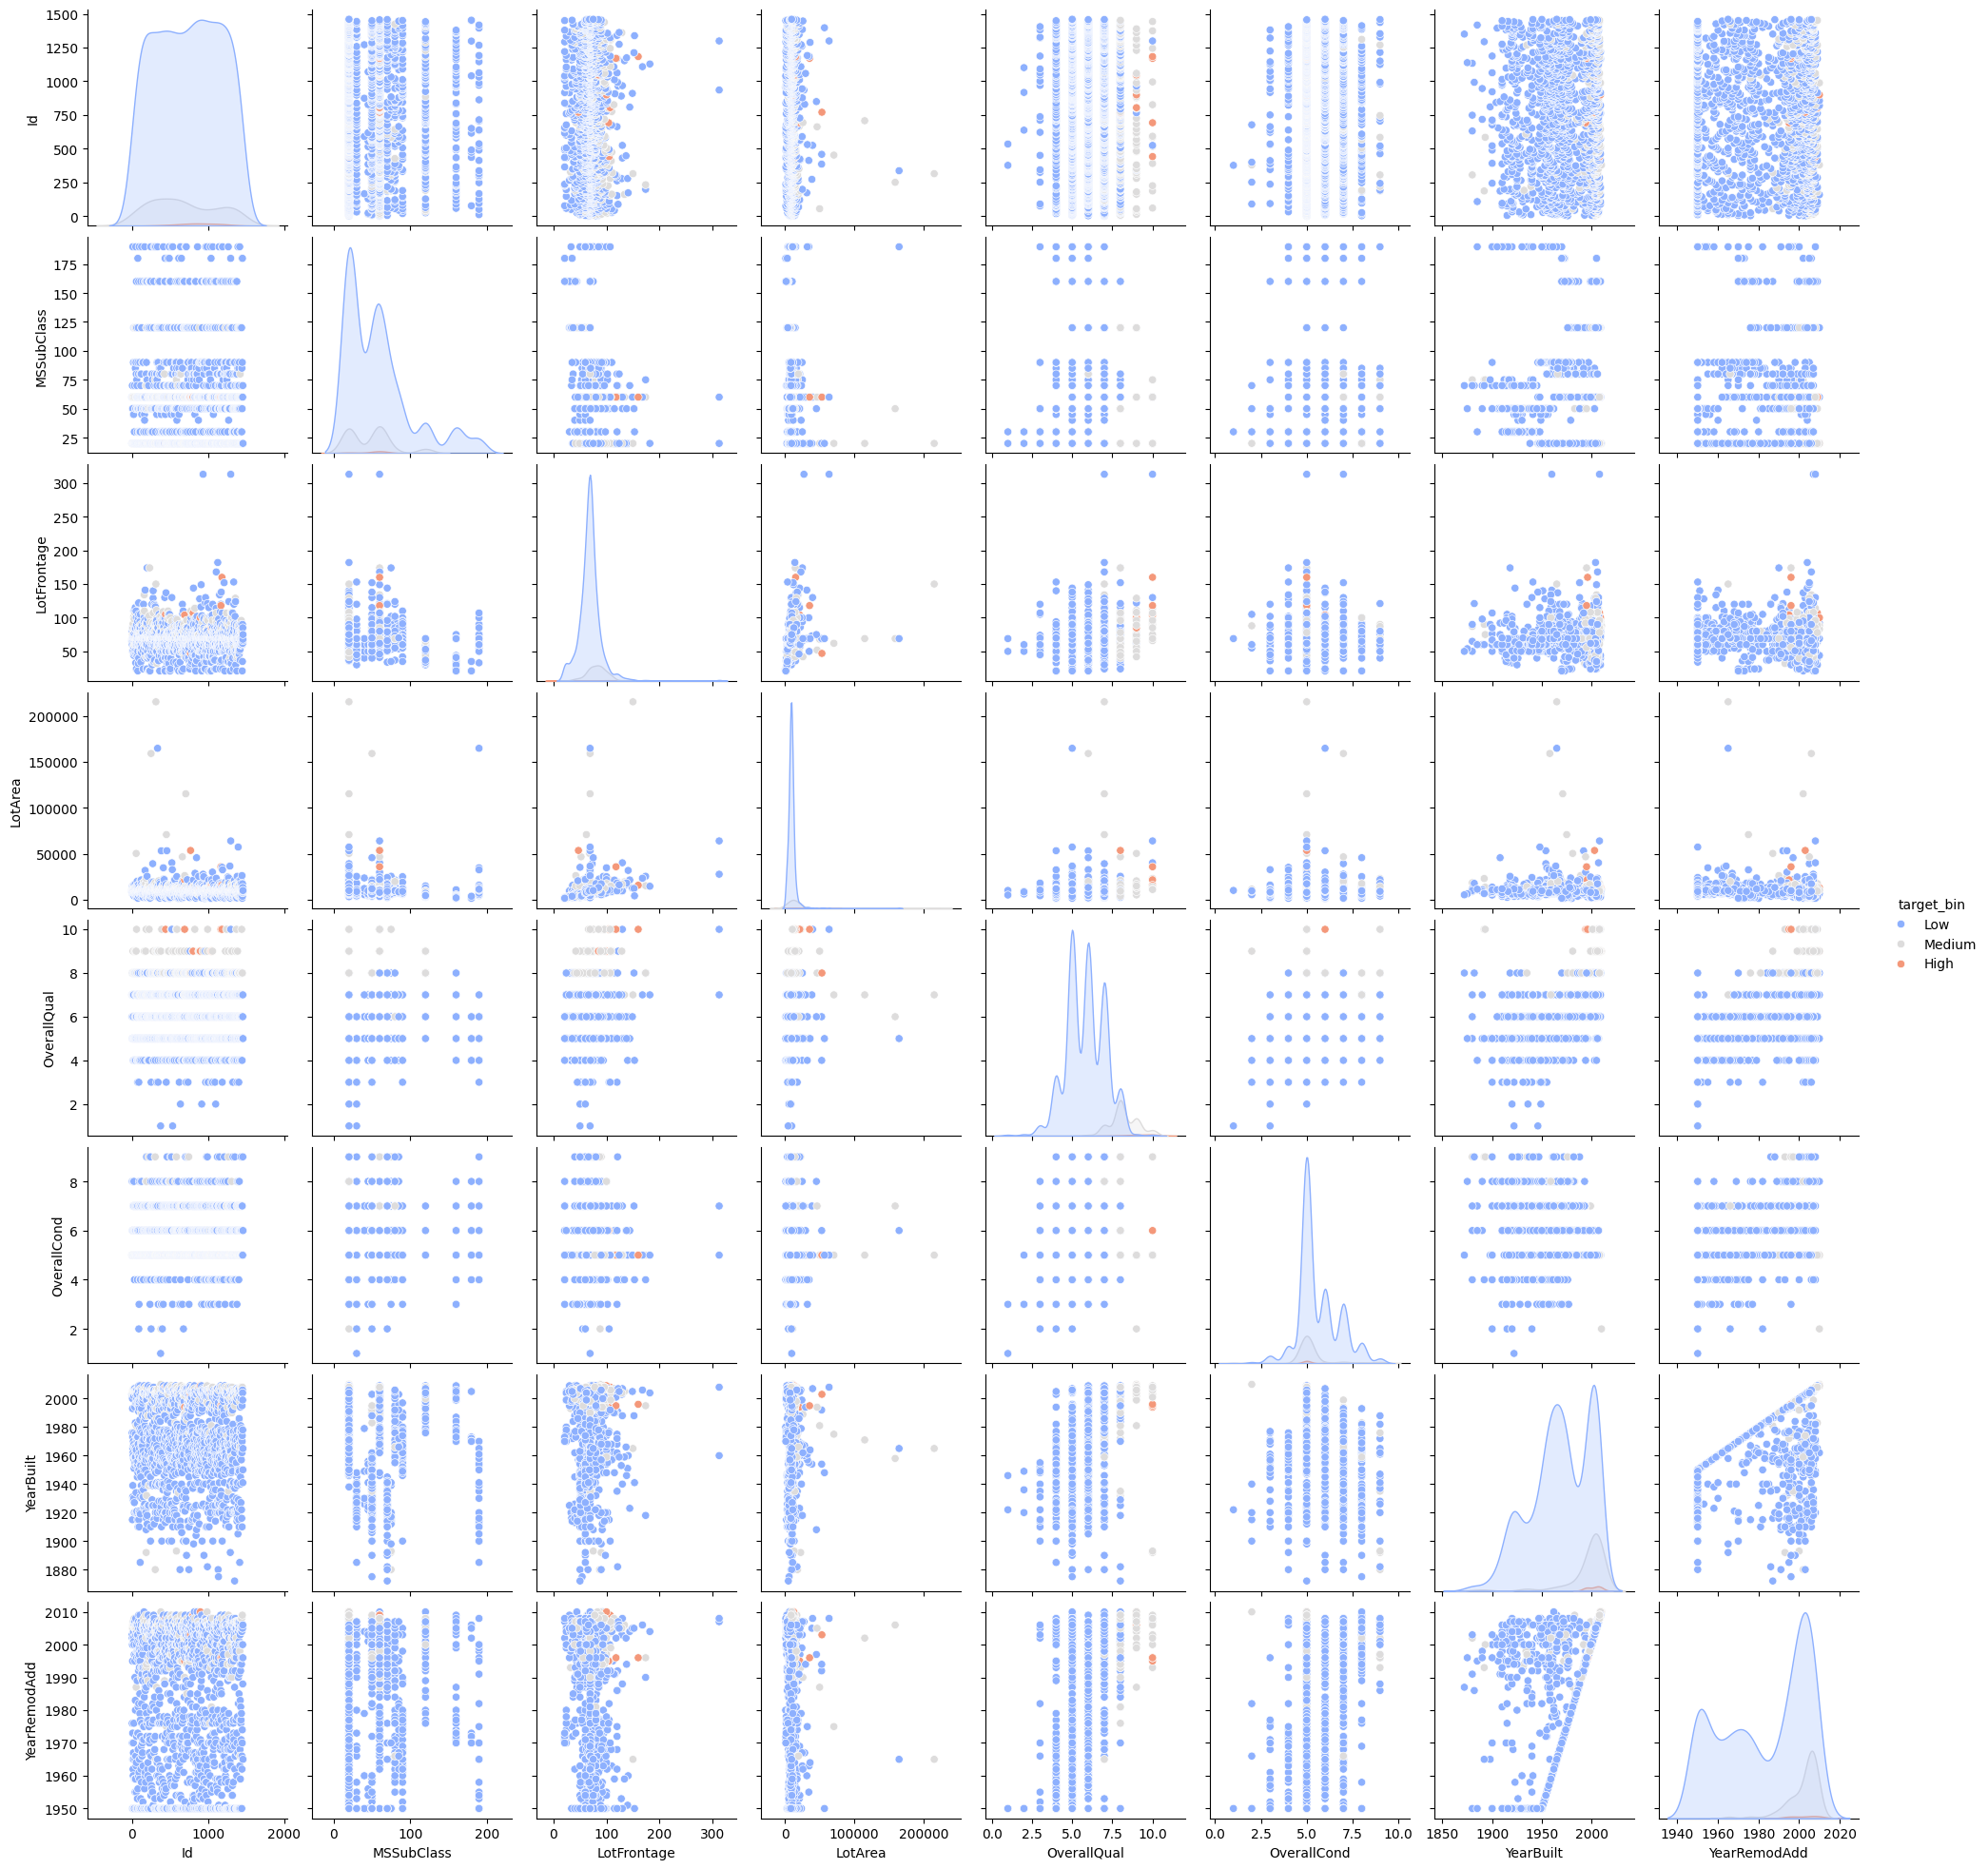

In [7]:
# Taking eight numerical feature for visualization 

eight_feat = train[numerical_features].iloc[:,:8]
plt.figure(figsize=(16,12))
plt.suptitle("Histograms for 8 numerical features")

for i in range(1,9):
    plt.subplot(4,2,i)
    sns.histplot(eight_feat.iloc[:,i-1],kde=True)
    plt.title(eight_feat.columns[i-1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

eight_feat['target_bin'] = pd.cut(train['SalePrice'], bins=3, labels=['Low', 'Medium', 'High'])
sns.pairplot(eight_feat, hue='target_bin', palette='coolwarm');


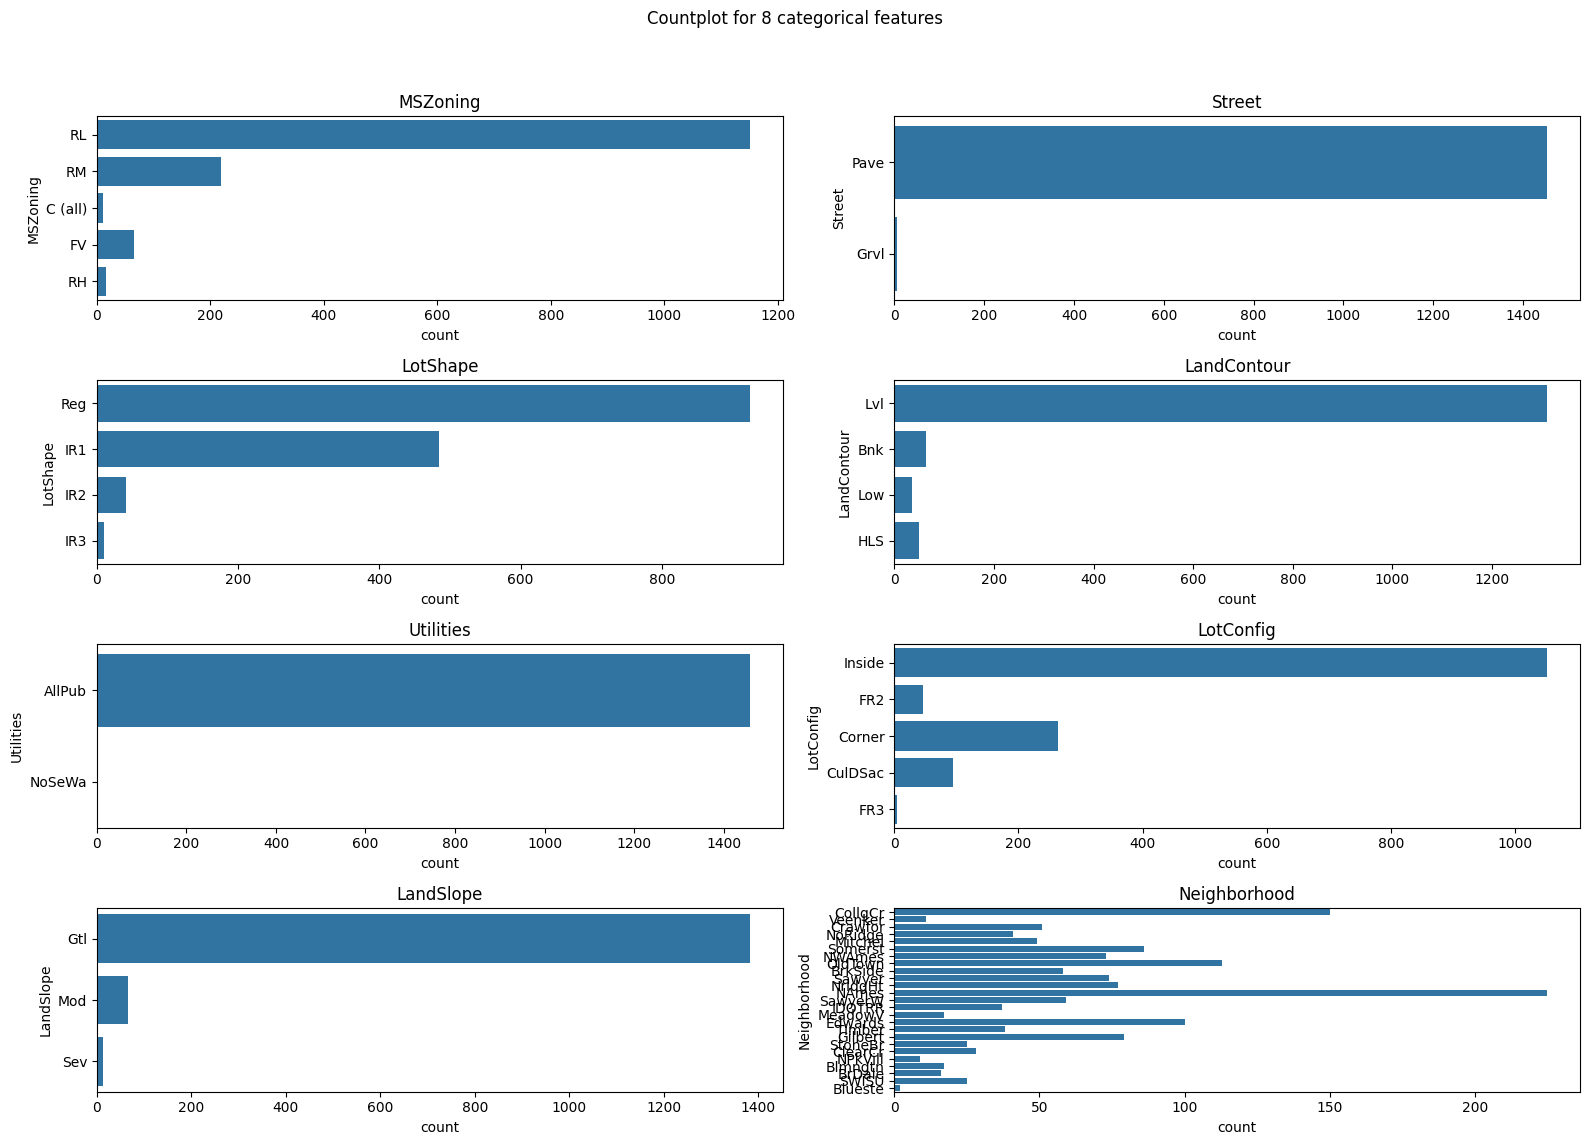

In [8]:
#  Taking eight categorical features for visualization

eight_feat = train[categorical_features].iloc[:,:8]
plt.figure(figsize=(16,12))
plt.suptitle("Countplot for 8 categorical features")
for i in range(1,9):
    plt.subplot(4,2,i)
    sns.countplot(eight_feat.iloc[:,i-1])
    plt.title(eight_feat.columns[i-1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

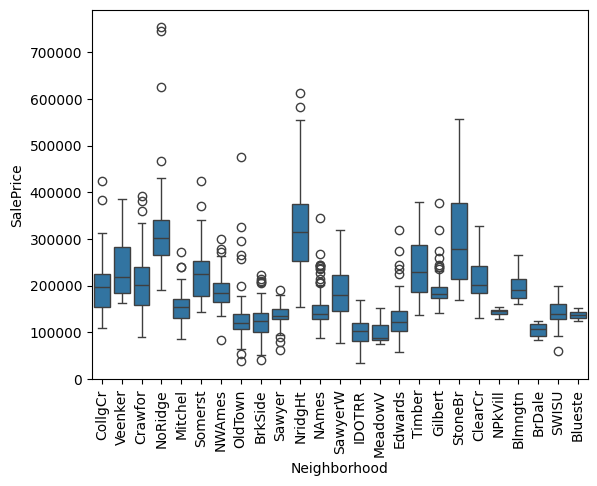

In [9]:
sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'])
plt.xticks(rotation=90);

GarageArea    GarageCars      0.882475
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
SalePrice     OverallQual     0.790982
YearBuilt     GarageYrBlt     0.777182
SalePrice     GrLivArea       0.708624
GrLivArea     2ndFlrSF        0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GarageCars    SalePrice       0.640409
dtype: float64


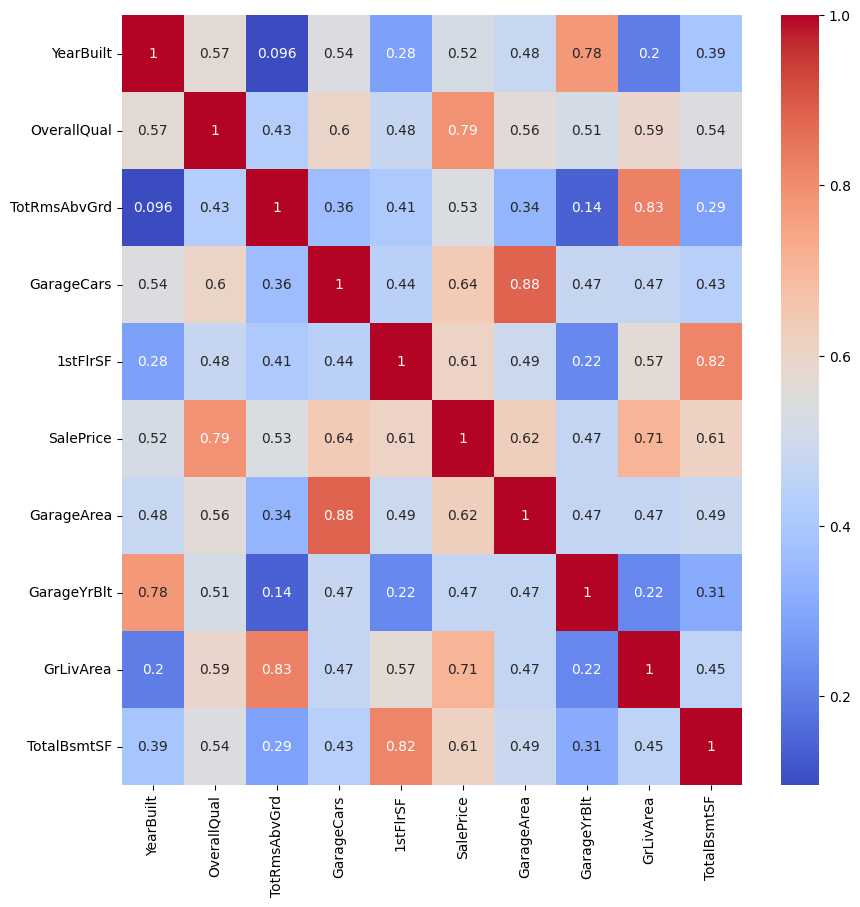

In [10]:
# Multivariate Analysis for Numerical Features

corr_matrix = train[numerical_features].corr()

high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr<1]
high_corr = high_corr.drop_duplicates()

top_5_pairs = high_corr.head(5)
columns = list(set([i for i,j in top_5_pairs.index] + [j for i,j in top_5_pairs.index]))

print(high_corr[:10])

plt.figure(figsize=(10,10))
sns.heatmap(train[columns].corr(), annot=True, cmap='coolwarm');

# From heatmap we can say that OverallQual and GrLivArea are strong features for SalePrice

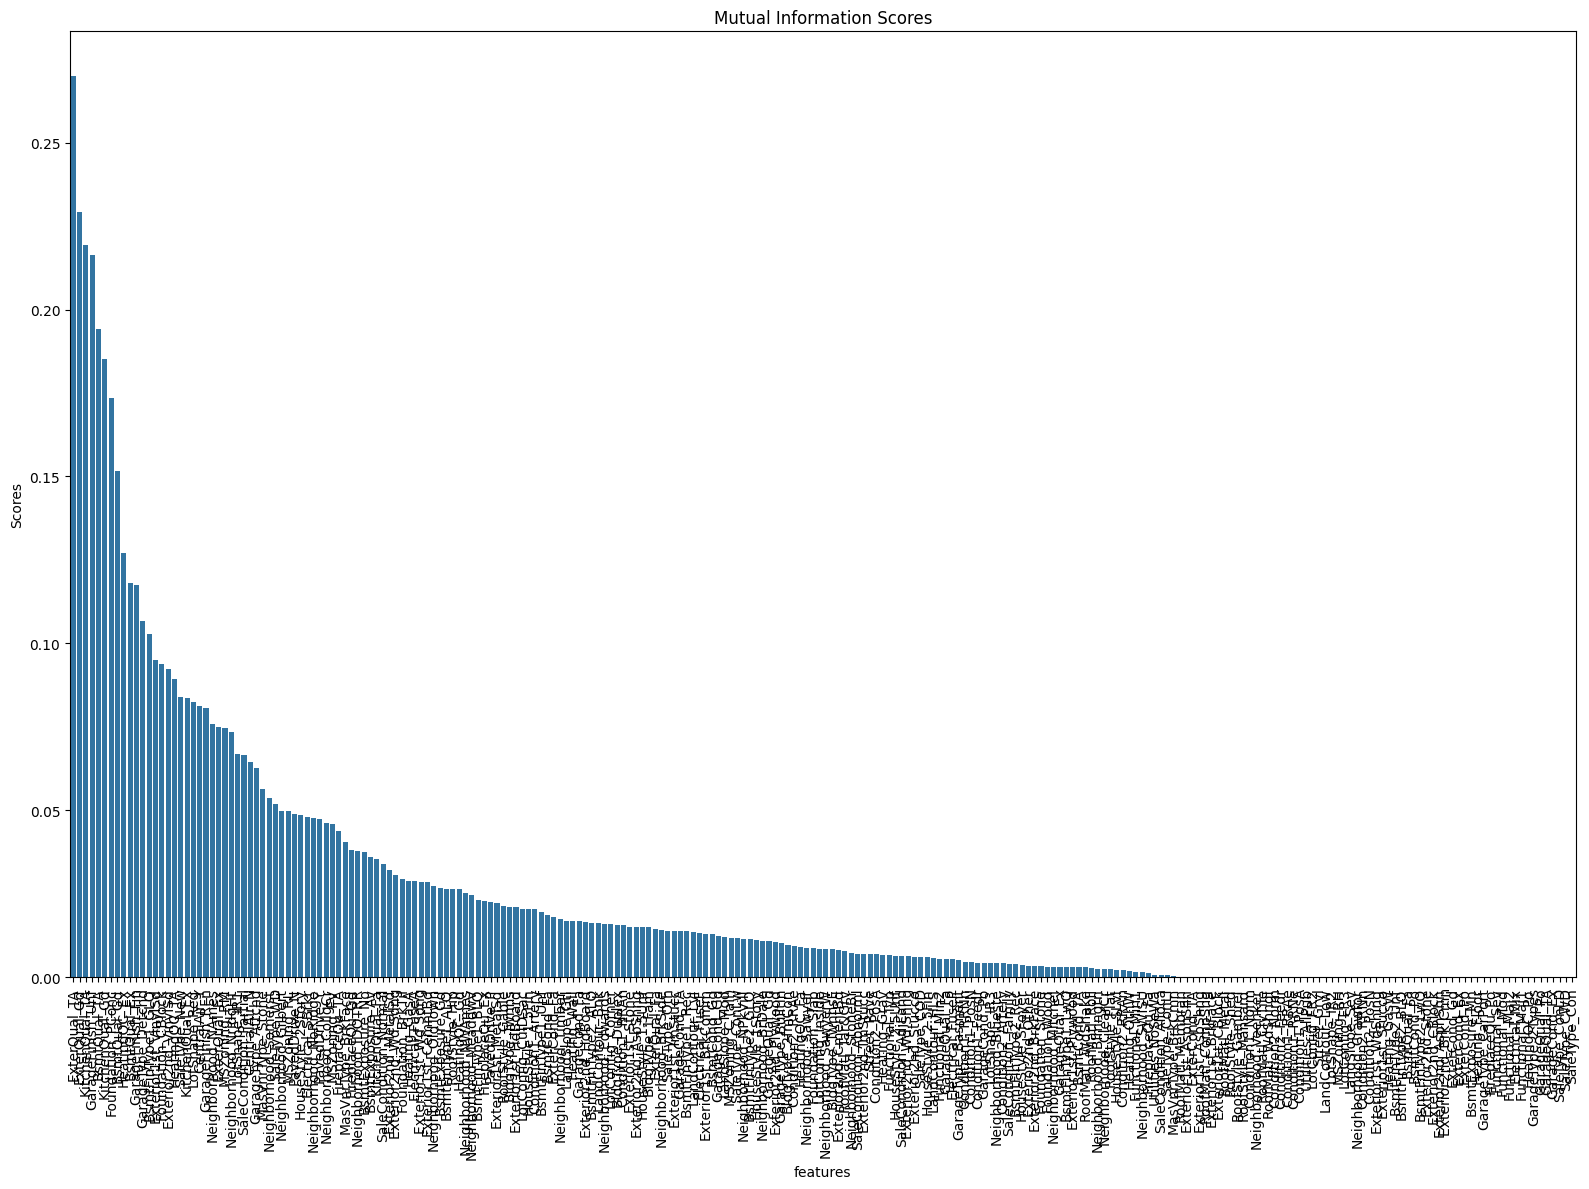

In [11]:
# Bivariate Analysis for Categorical Features
# Mutual information of categorical data with target variable 
from sklearn.feature_selection import mutual_info_regression

X = train[categorical_features]
y = train['SalePrice']

X_encoded = pd.get_dummies(X)

mi_scores = mutual_info_regression(X_encoded,y)

scores = pd.DataFrame({
    "Scores":mi_scores,
    "features":X_encoded.columns
})
scores.sort_values(by='Scores', ascending=False, inplace=True)
plt.figure(figsize=(16,12))
sns.barplot(data=scores, x='features', y='Scores')
plt.title("Mutual Information Scores")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Feature with high MI
print(scores.iloc[:10,:])

       Scores          features
131  0.269797      ExterQual_TA
130  0.229324      ExterQual_Gd
188  0.219382    KitchenQual_TA
209  0.216292  GarageFinish_Unf
146  0.194193       BsmtQual_TA
187  0.185257    KitchenQual_Gd
139  0.173588  Foundation_PConc
145  0.151502       BsmtQual_Gd
173  0.127014      HeatingQC_Ex
143  0.118249       BsmtQual_Ex


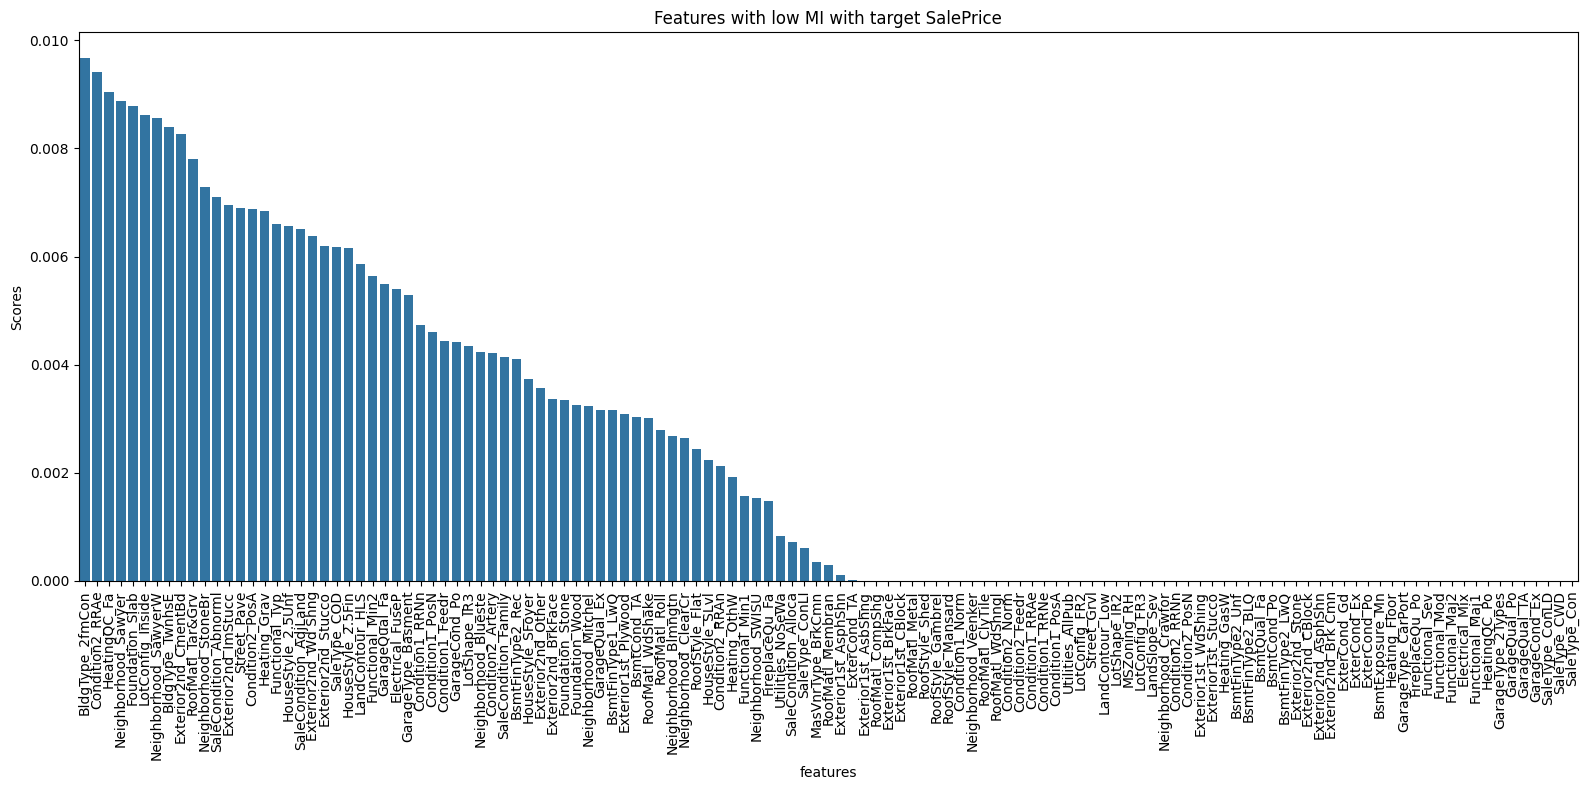

In [13]:
# Features with low MI

# We may have to drop the features with low MI
low_mi = scores[scores['Scores'] < 0.01]

plt.figure(figsize=(16,8))
sns.barplot(data=low_mi, x='features', y='Scores')
plt.xticks(rotation=90)
plt.title("Features with low MI with target SalePrice")
plt.tight_layout()
plt.show()

In [14]:
#  Simple feature engineering

# Combines all SF into total
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# HouseAge is equal to YrSold - YearBuilt
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

# Validating whether to keep the old features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

cols_to_test = ['TotalSF', 'HouseAge']
cols_original = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YrSold']

X = train[cols_original]
X_new = train[cols_to_test]
X_combined = train[cols_to_test+cols_original]
y = train['LogSalePrice']

score = cross_val_score(LinearRegression(), X, y, cv=5).mean()
score_new = cross_val_score(LinearRegression(), X_new, y, cv=5).mean()
score_combined = cross_val_score(LinearRegression(), X_combined, y, cv=5).mean()

print(f"New Features Score: {score_new:.3f}")
print(f"Original Features Score: {score:.3f}")
print(f"Combined Features Score: {score_combined:.3f}")

# Remove the old one only if both score are equal or new is greater 

New Features Score: 0.705
Original Features Score: 0.719
Combined Features Score: 0.719


In [15]:
print("""
Insights:
    - Shape: (1460,81)
    
    - Features ['PoolQC','MiscFeature','Alley','Fence'] have too many missing values. (Hence dropped)
    
    - Null values were imputed using Simple Imputer.
    
    - Target feature 'SalePrice' was right skewed. Hence normalized it.
    
    - Strong predictors (numerical): OverallQual, GrLivArea, TotalSF.
    
    - Strong predictors (categorical): ExterQual, KitchenQual, GarageFinish, Neighborhood
    
    - Some feature with high correlation(e.g GarageArea and GarageCars). One of them can be dropped.
    
    - Many feature with low MI. Similar to feature engineering, we can compare cross_val_score the original and dropped one. 
""")


Insights:
    - Shape: (1460,81)
    
    - Features ['PoolQC','MiscFeature','Alley','Fence'] have too many missing values. (Hence dropped)
    
    - Null values were imputed using Simple Imputer.
    
    - Target feature 'SalePrice' was right skewed. Hence normalized it.
    
    - Strong predictors (numerical): OverallQual, GrLivArea, TotalSF.
    
    - Strong predictors (categorical): ExterQual, KitchenQual, GarageFinish, Neighborhood
    
    - Some feature with high correlation(e.g GarageArea and GarageCars). One of them can be dropped.
    
    - Many feature with low MI. Similar to feature engineering, we can compare cross_val_score the original and dropped one. 

